# EDA - Rotten Tomatoes reviews

### Datacard :
Generat information:
The data comprises of textual content, labeled as postive and negative. this textual data can be used to train a model to perform sentiment analysis. 

Files:
</br>a. rt-polaritydata.tar.gz: compressed file containing data in the form of files:
    </br> &nbsp;&nbsp;&nbsp;&nbsp; 1. rt-polarity.pos - this file contains potivie sentiments.
    </br> &nbsp;&nbsp;&nbsp;&nbsp; 2. rt-polarity.neg - this file contains negaive sentiments.


## Import Libraries

In [1]:
#include necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

## Import data

The data is available in two distinct text files. To perform analysis on the data, we aim to import it into a DataFrame. To achieve this, we will gather all the positive sentiments into one list and all the negative sentiments into another list.

In [2]:
data_dir = "./data/rt-polaritydata/"
pos_samples, neg_samples = None, None

for file in os.listdir(data_dir):
    print(file)
    path = os.path.join(data_dir, file)

    if file == "rt-polarity.pos":
        with open(path, "r", encoding="latin-1") as f:
            pos_samples = [line.strip() for line in f]

    elif file == "rt-polarity.neg":
        with open(path, "r", encoding="latin-1") as f:
            neg_samples = [line.strip() for line in f]

    if pos_samples is not None and neg_samples is not None:
        break

rt-polarity.neg
rt-polarity.pos


## Create a DataFrame for further analysis

Once both the data files are stored in separate lists, we will create DataFrames for each list. We will add a sentiment column to each DataFrame, labeling the positive sentiments as 1 and the negative sentiments as 0. Afterward, we will concatenate the two newly created DataFrames to form a single DataFrame containing the entire dataset.

In [3]:
df_pos = pd.DataFrame({'review': pos_samples, 'sentiment': 1}) #1 for positive
df_neg = pd.DataFrame({'review': neg_samples, 'sentiment': 0}) #0 for negative

In [4]:
df_pos.head()

,review,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [5]:
df_neg.head()

,review,sentiment
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


In [6]:
df = pd.concat([df_pos, df_neg], ignore_index=True)

In [7]:
df.head()

,review,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


# Check for data-quality

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10662 entries, 0 to 10661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10662 non-null  object
 1   sentiment  10662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 166.7+ KB


The dataset contains two columns: "review" and "sentiment". "review" column is contains string value and "sentiment" column contains integer values (binary) 0 and 1. The "sentiment" column represents the sentiment of each review, where a positive sentiment is represented by 1 and a negative sentiment is represented by 0. This dataset can be used to train a sentiment analysis model.

The sentiment of a review is determined based on the presence of specific words. If the review includes words like "good," "love," or "amazing," it indicates a positive sentiment. Conversely, if the review contains words like "hate," "disgusting," or "waste," it suggests a negative sentiment.

In [9]:
df.describe()

,sentiment
count,10662.000000
mean,0.500000
std,0.500023
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


The dataset comprises a total of 10,662 reviews and its corresponding sentiments, consisting of both 0's and 1's. The mean of the sentiments is 0.5, indicating an equal distribution between the two values. The minimum value is 0, while the maximum value is 1.

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

The dataset is free of any null values, making it suitable for analysis without any missing data concerns.

In [11]:
df['sentiment'].value_counts()

sentiment
1    5331
0    5331
Name: count, dtype: int64

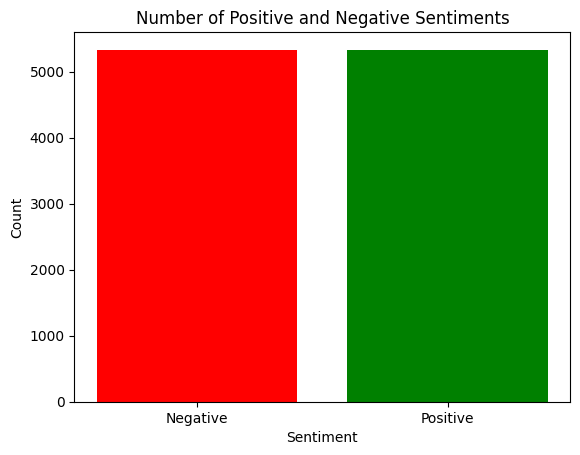

In [12]:
sentiment_counts = df['sentiment'].value_counts()

colors = ['green', 'red']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Sentiments')

plt.xticks(sentiment_counts.index, ['Positive', 'Negative'])

plt.show()

We observe that both types of sentiments consist of an equal number of values, specifically 5331 each. To ensure an equal distribution and eliminate bias in the dataset, we can perform stratified sampling or resampling techniques such as oversampling or undersampling. These techniques aim to balance the class distribution by either increasing the representation of the minority class (oversampling) or decreasing the representation of the majority class (undersampling). By applying such methods, we can create a more balanced and unbiased dataset for further analysis.

### WordCloud
To analyze the most common words in both negative and positive sentiments, we can create word clouds for each category. The word clouds will visually represent the frequency of words in the respective sentiment categories and help identify common words shared between them.

By generating separate word clouds for negative and positive sentiments, we can observe the prominent words associated with each sentiment. Additionally, comparing the word clouds can reveal words that appear frequently in both categories, indicating shared vocabulary.

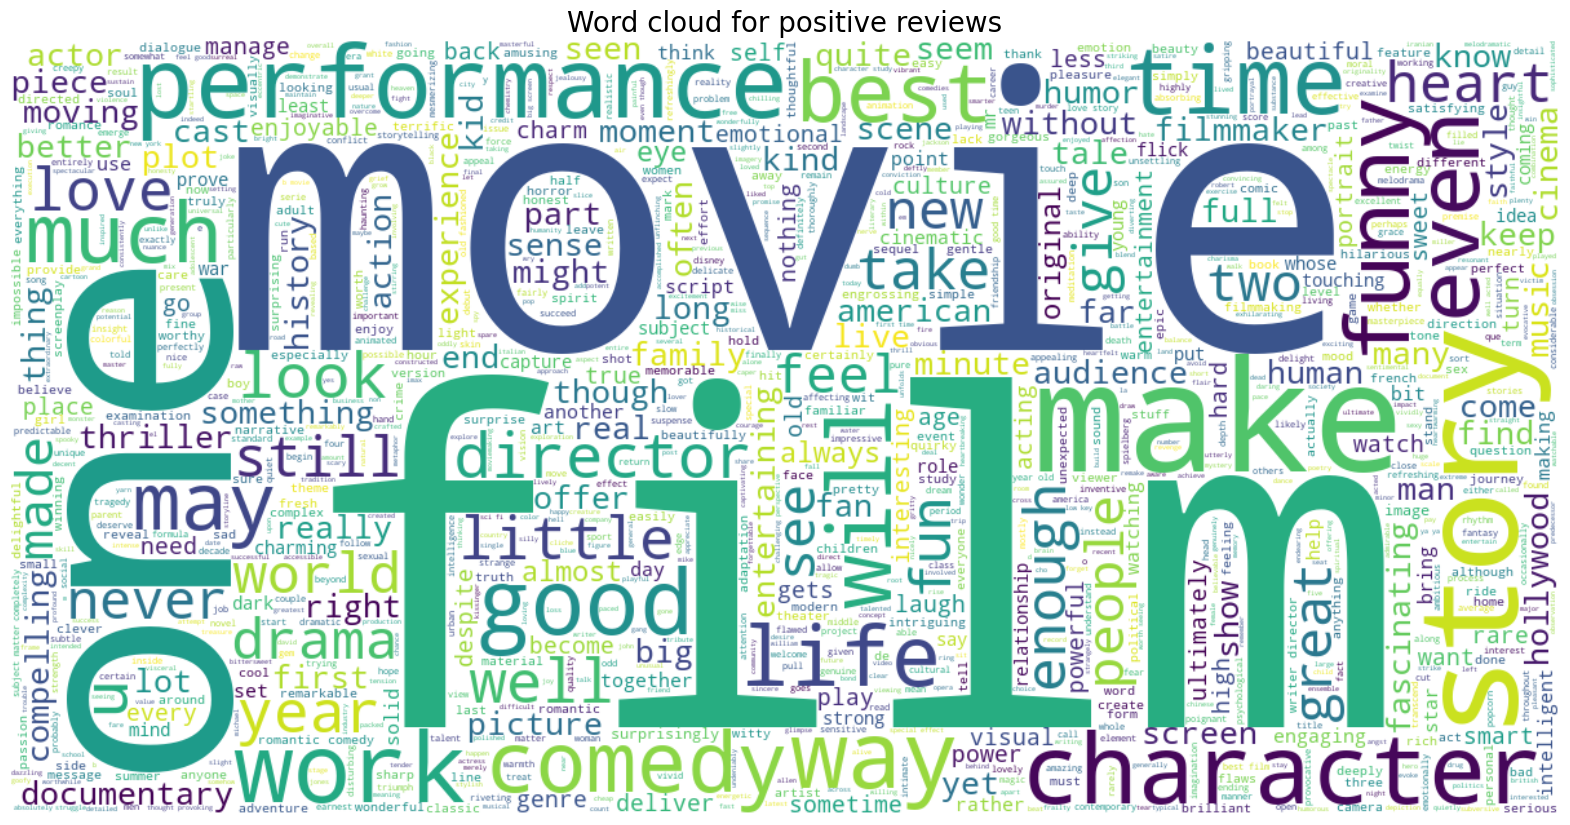

In [13]:
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

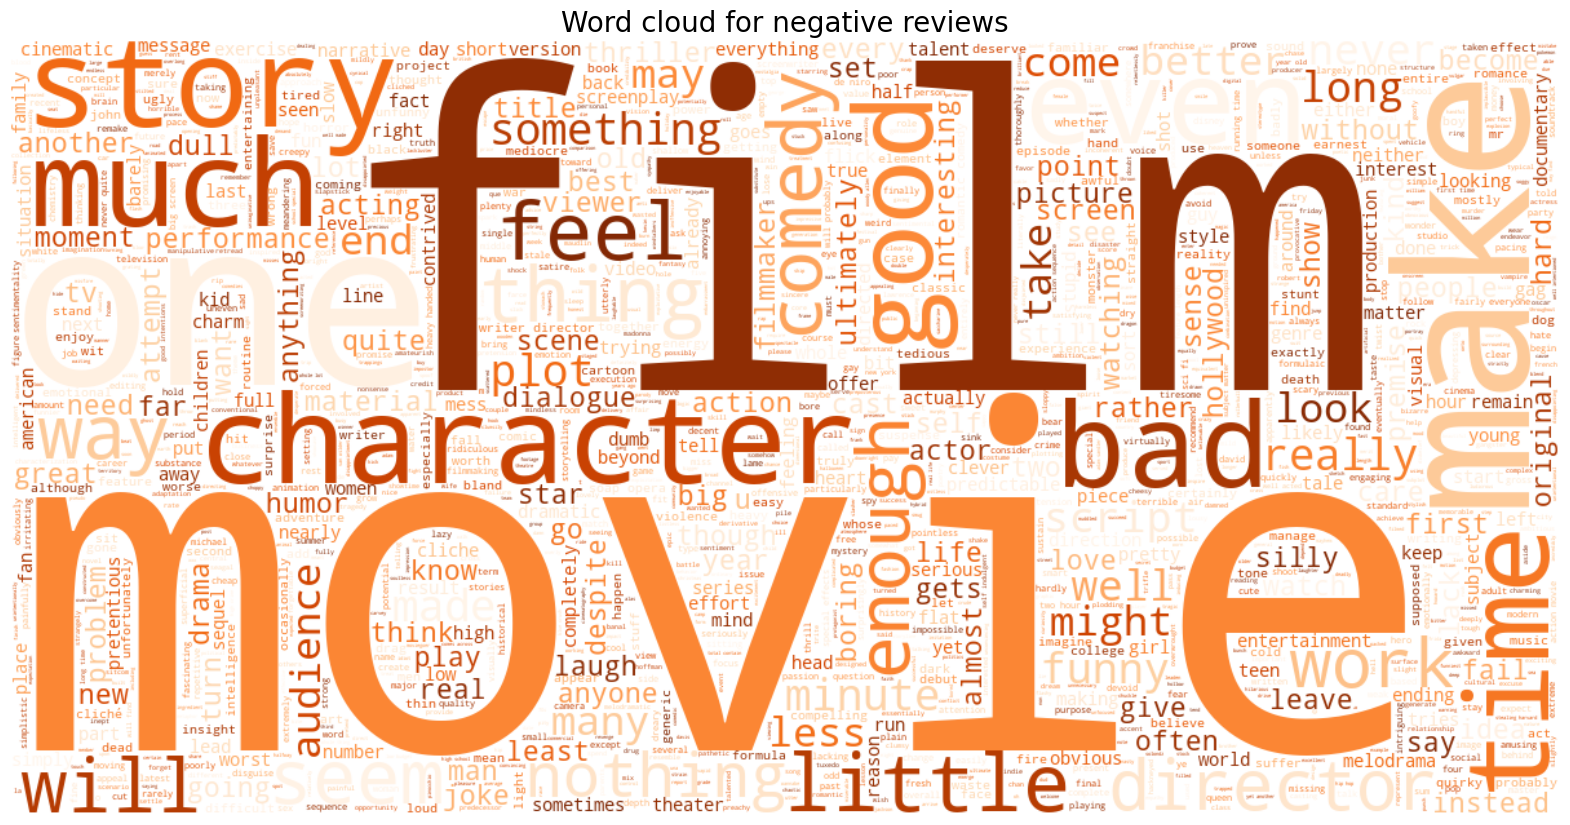

In [14]:
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white",colormap='Oranges_r').generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

Upon analyzing the word clouds, we observe that the words 'film', 'movie', and 'make' appear prominently in both sentiment categories. These common words can be excluded from further analysis or from building a sentiment analysis model, as they may not provide distinct insights.

Additionally, the word clouds highlight the most frequent words used in each sentiment category. Negative movie reviews often feature words like 'bad' and 'little', indicating common negative sentiments. On the other hand, positive movie reviews frequently include words such as 'best', 'world', 'good', and 'one', indicating positive sentiments and appreciation.

These word clouds help identify the prevalent words in each sentiment category, enabling a deeper understanding of the most commonly expressed opinions in movie reviews.

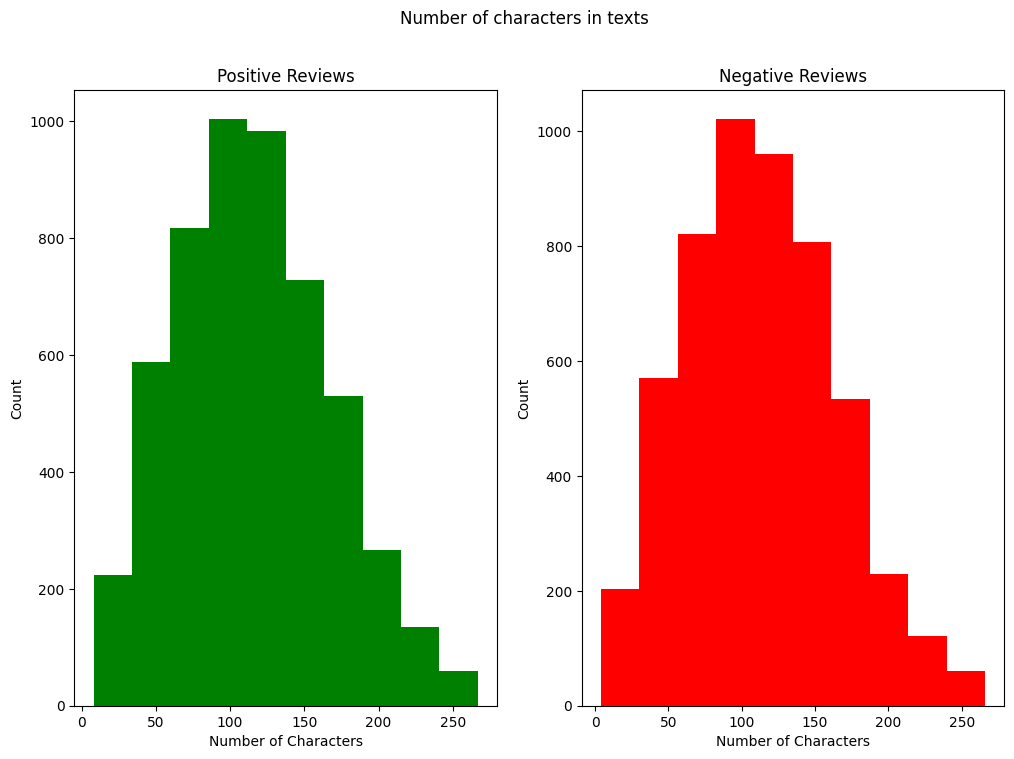

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

By plotting the number of characters in a movie review against the corresponding number of reviews for each sentiment category, we can compare the trends between the two. Upon analysis, we observe that both sentiment categories exhibit a similar trend, making it difficult to differentiate them significantly based on the number of characters.

The comparison suggests that the length of the movie reviews may not be a distinguishing factor between positive and negative sentiments. Further analysis using alternative features or techniques may be required to effectively differentiate between the two sentiment categories.

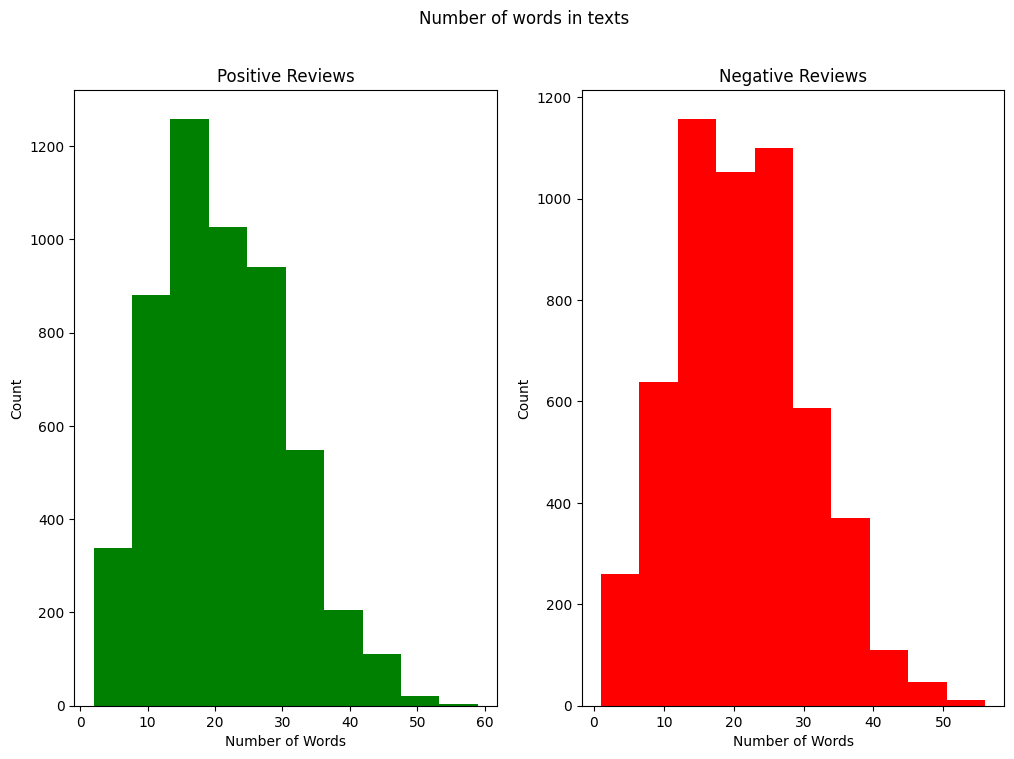

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

Similarly, when comparing the plot of the number of words in a movie review to their corresponding sentiment types, a noticeable trend emerges. Specifically, in the case of negative comments, there is a substantial increase in the number of reviews falling within the range of 20-30 words. This observation suggests that people, when frustrated, tend to express their dissatisfaction with longer reviews, possibly as a means of venting their frustrations. In contrast, positive comments do not exhibit a similar concentration in any specific word count range, indicating a more varied expression of satisfaction or appreciation.